We will build a classifier that takes an image of a handwritten digit and outputs a label 0-9. We will look at a 
particularly simple strategy for this problem known as the nearest neighbor classifier. 
To run this notebook we should have the following Python packages installe
* Numpy
* Matplotlib
* sklearnrnd:

## The MNIST dataset * 
"MNIST" is a classic dataset in machine learning, consisting of 28x28 gray-scale images handwritten digits.
The original training set contains 60,000 examples and the test set contains 10,000 examples. In thi 
notebook we will be working with a subset of this data: a training set of 7500 examples and a test set f 
1,000 examples. 

About the dataset 
Four files are available on this package: 
* training set images 
* training set labels 
* test set images 
* test set labels 


These files are not in any standard image format. You have to write your own (very simple) program to read them. You can find more details about the dataset here: http://yann.lecun.com/exdb/mnist/ 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import time 

In [2]:
#Load the training set: 
train_data = np.load(r"K:\DATA SCIENCE\DataSets\TopMentor Datasets\data\train_data.npy") 
train_labels = np.load(r"K:\DATA SCIENCE\DataSets\TopMentor Datasets\data\train_labels.npy")

In [3]:
#Load the testing set: 
test_data = np.load(r"K:\DATA SCIENCE\DataSets\TopMentor Datasets\data\test_data.npy") 
test_labels = np.load(r"K:\DATA SCIENCE\DataSets\TopMentor Datasets\data\test_labels.npy") 

In [4]:
#Print out data dimensions: 
print("Training dataset dimensions: ", np.shape(train_data)) 
print("Number of training labels: ", len(train_labels)) 
print("Testing dataset dimensions: ", np.shape(test_data)) 
print("Number of testing labels: ", len(test_labels))

Training dataset dimensions:  (7500, 784)
Number of training labels:  7500
Testing dataset dimensions:  (1000, 784)
Number of testing labels:  1000


In [5]:
#Compute the number of examples of each digit: 
train_digits, train_counts = np.unique(train_labels, return_counts=True) 
print("Training set distribution:") 
print(dict(zip(train_digits, train_counts))) 
test_digits, test_counts = np.unique(test_labels, return_counts=True) 
print("Test set distribution:") 
print(dict(zip(test_digits, test_counts))) 

Training set distribution:
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
Test set distribution:
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


## Visualizing the data 

In [6]:
#2. Visualizing the data 
#Each data point is stored as 784-dimensional vector. To visualize a data point, 
# we first reshape it to a 28x28 image. 
#Define a function that displays a digit given its vector representation: 
def show_digit(x): 
    plt.axis('off') 
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray) 
    plt.show() 
    return

In [7]:
#Define a function that takes an index into a particular data set ("train" or "test") and displays that image. 
def vis_image(index, dataset="train"): 
    if(dataset=="train"): 
        show_digit(train_data[index,]) 
        label = train_labels[index] 
    else: 
        show_digit(test_data[index,]) 
        label = test_labels[index] 
    print("Label " + str(label)) 
    return 

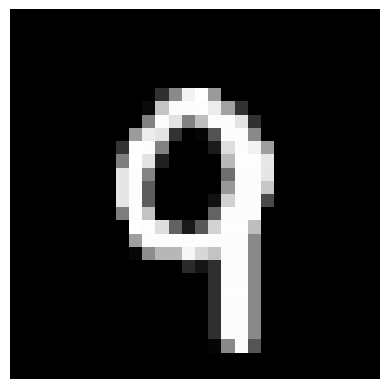

Label 9


In [8]:
#View the first data point in the training set: 
vis_image(0, "train") 

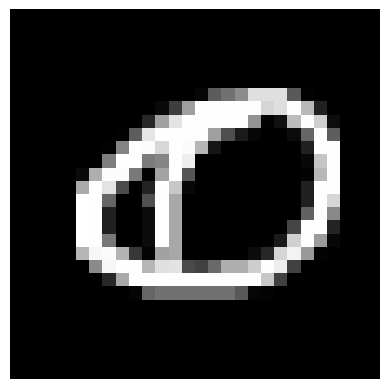

Label 0


In [9]:
# View the first data point in the test set: 
vis_image(0, "test") 

## Squared Euclidean distance 
* To compute nearest neighbors in our data set, we need to compute distances between data points.
* A natural distance function is Euclidean distance: for two vectors x, y and their Euclidean distance is defined as 

d =√((x2 – x1)2 + (y2 – y1)^2)


In [10]:
#Function that computes squared Euclidean distance between two vectors. 
def squared_dist(x,y): 
    return np.sum(np.square(x-y)) 

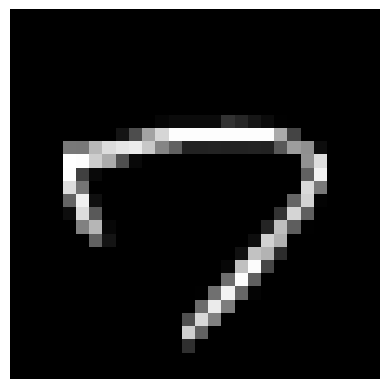

Label 7


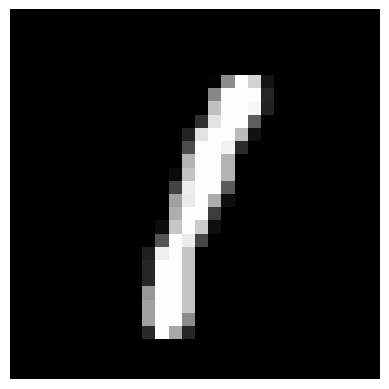

Label 1
Distance from 7 to 1:  5357193.0


In [11]:
#Compute distance between a seven and a one in our training set. 
vis_image(4, "train") 
vis_image(5, "train") 
print("Distance from 7 to 1: ", squared_dist(train_data[4,],train_data[5,])) 

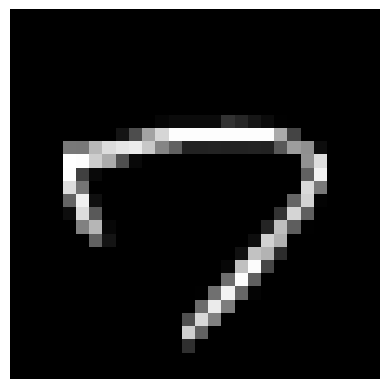

Label 7


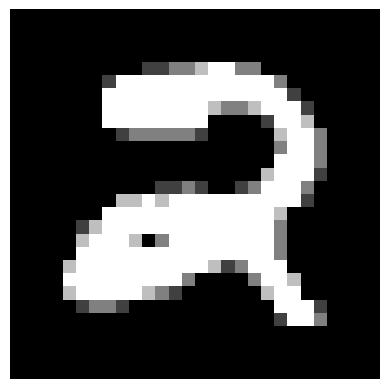

Label 2
Distance from 7 to 2:  12451684.0


In [12]:
#Compute distance between a seven and a two in our training set. 
vis_image(4, "train") 
vis_image(1, "train") 
print("Distance from 7 to 2: ", squared_dist(train_data[4,],train_data[1,])) 

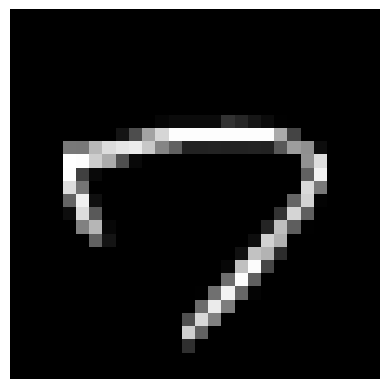

Label 7


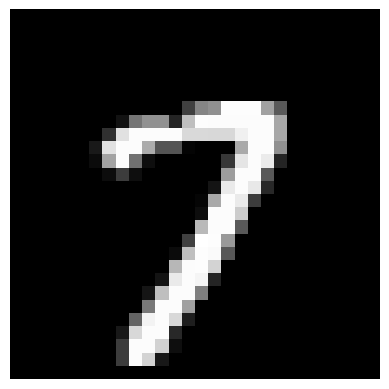

Label 7
Distance from 7 to 7:  5223403.0


In [13]:
#Compute distance between two seven's in our training set. 
vis_image(4, "train") 
vis_image(7, "train") 
print("Distance from 7 to 7: ", 
squared_dist(train_data[4,],train_data[7,]))

## Computing nearest neighbors 
* Now that we have a distance function defined, we can now turn to nearest neighbor classification. 
* Function that takes a vector x and returns the index of its nearest neighbor in train_data.

In [14]:
#4. Computing nearest neighbors 
#Now that we have a distance function defined, 
# we can now turn to nearest neighbor classification. 
 
#Function that takes a vector x and returns the index 
# of its nearest neighbor in train_data. 
def find_NN(x): 
    # Compute distances from x to every row in train_data 
    distances = [squared_dist(x,train_data[i,]) for i in range(len(train_labels))] 
    # Get the index of the smallest distance 
    return np.argmin(distances)

In [15]:
#Function that takes a vector x and returns the class of its nearest neighbor in train_data. 
def NN_classifier(x): 
    # Get the index of the the nearest neighbor 
    index = find_NN(x) 
    # Return its class 
    return train_labels[index] 

A success case:
NN classification:  0
True label:  0
The test image:


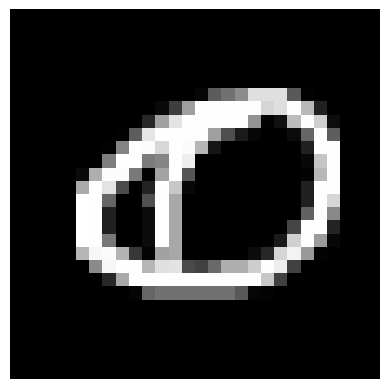

Label 0
The corresponding nearest neighbor image:


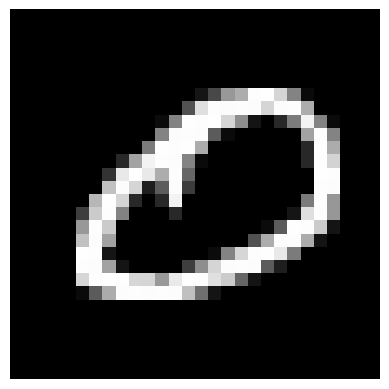

Label 0


In [16]:
#A success case: 
print("A success case:") 
print("NN classification: ", NN_classifier(test_data[0,])) 
print("True label: ", test_labels[0]) 
print("The test image:") 
vis_image(0, "test") 
print("The corresponding nearest neighbor image:") 
vis_image(find_NN(test_data[0,]), "train") 

A failure case:
NN classification:  2
True label:  3
The test image:


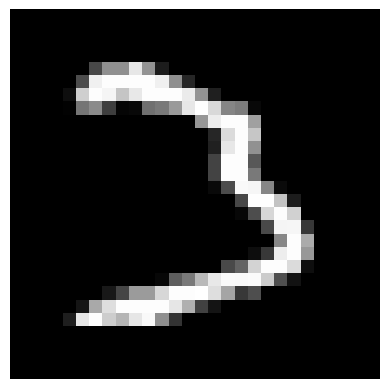

Label 3
The corresponding nearest neighbor image:


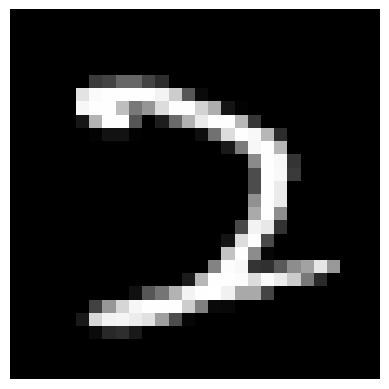

Label 2


In [17]:
 
#A failure case: 
print("A failure case:") 
print("NN classification: ", NN_classifier(test_data[39,])) 
print("True label: ", test_labels[39]) 
print("The test image:") 
vis_image(39, "test") 
print("The corresponding nearest neighbor image:") 
vis_image(find_NN(test_data[39,]), "train") 

## Processing the full test set 
* Let us apply our nearest neighbor classifier over the full data set. 
* To classify each test point, our code takes a full pass over each of the 7500 training examples. Thus we should not expect testing to be very fast. 
* Let us predict on each test data point (and time it!) 

In [18]:
#5. Processing the full test set 
t_before = time.time() 
test_predictions = [NN_classifier(test_data[i,]) for i in range(len(test_labels))] 
t_after = time.time() 

In [19]:
# Compute the error: 
err_positions = np.not_equal(test_predictions, test_labels) 
error = float(np.sum(err_positions))/len(test_labels) 
print("Error of nearest neighbor classifier: ", error) 
print("Classification time (seconds): ", t_after - t_before) 

Error of nearest neighbor classifier:  0.046
Classification time (seconds):  50.77689266204834


## Faster nearest neighbor methods 
* Performing nearest neighbor classification in the way we have presented requires a full pass through the training set in order to classify a single point.
* If there are N training points in Rd, this takes O(Nd)  time. 
* Fortunately, there are faster methods to perform nearest neighbor. "scikit-learn" has fast implementations of two useful nearest neighbor data structures: the ball tree and the k-d tree. 

In [20]:
#6. Faster nearest neighbor methods 
from sklearn.neighbors import BallTree 
# Build nearest neighbor structure on training data 
t_before = time.time() 
ball_tree = BallTree(train_data) 
t_after = time.time() 

In [21]:
# Compute training time 
t_training = t_after - t_before 
print("Time to build data structure (seconds): ", t_training) 

Time to build data structure (seconds):  0.422590970993042


In [22]:
# Get nearest neighbor predictions on testing data 
t_before = time.time() 
test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False)) 
ball_tree_predictions = train_labels[test_neighbors] 
t_after = time.time() 

In [23]:
# Compute testing time 
t_testing = t_after - t_before 
print("Time to classify test set (seconds): ", t_testing) 
# Verify that the predictions are the same 
print("Ball tree produces same predictions as above? ", 
np.array_equal(test_predictions, ball_tree_predictions)) 

Time to classify test set (seconds):  7.126349925994873
Ball tree produces same predictions as above?  True


In [24]:
from sklearn.neighbors import KDTree 
# Build nearest neighbor structure on training data 
t_before = time.time() 
kd_tree = KDTree(train_data) 
t_after = time.time() 

In [25]:
# Compute training time 
t_training = t_after - t_before 
print("Time to build data structure (seconds): ", t_training)

Time to build data structure (seconds):  0.7021229267120361


In [26]:
# Get nearest neighbor predictions on testing data 
t_before = time.time() 
test_neighbors = np.squeeze(kd_tree.query(test_data, k=1, return_distance=False)) 
kd_tree_predictions = train_labels[test_neighbors] 
t_after = time.time() 

In [27]:
# Compute testing time 
t_testing = t_after - t_before 
print("Time to classify test set (seconds): ", t_testing)

Time to classify test set (seconds):  9.03245234489441


In [28]:
# Verify that the predictions are the same 
print("KD tree produces same predictions as above? ", 
np.array_equal(test_predictions, kd_tree_predictions))

KD tree produces same predictions as above?  True
